In [45]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
KS = fdr.DataReader('KS11', start='2000') # 코스피 지수

In [31]:
KS.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301
2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687
2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259
2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126
2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407


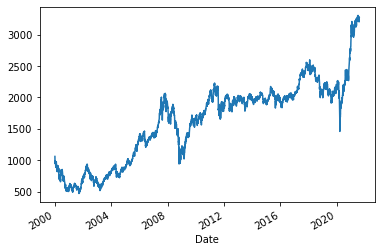

In [32]:
KS['Close'].plot()

In [33]:
def combine_seasonal_cols(input_df, seasonal_model_results):
    """Adds inplace new seasonal cols to df given seasonal results

    Args:
        input_df (pandas dataframe)
        seasonal_model_results (statsmodels DecomposeResult object)
    """
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend

In [34]:
KS_close = KS[['Close']].copy()

In [49]:
def first_day(entry):
    return entry[0]

beginning_price = KS_close.resample('M').apply(first_day)

In [50]:
beginning_price.head()

,Close
Date,
2000-01-31,1059.04
2000-02-29,928.75
2000-03-31,894.66
2000-04-30,846.44
2000-05-31,752.59


In [37]:
diff = (beginning_price - beginning_price.shift(1)).shift(-1)
monthly_return = diff.div(beginning_price).dropna()

In [38]:
sd = seasonal_decompose(monthly_return, period=12)
combine_seasonal_cols(monthly_return, sd) # custom helper function

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224B7B5BCD0>,
      dtype=object)

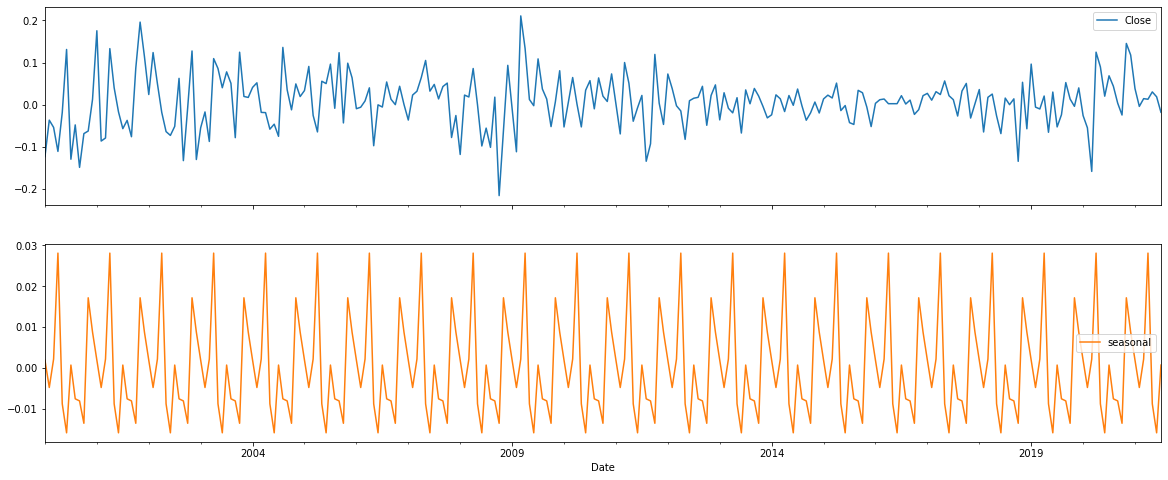

In [39]:
monthly_return[['Close','seasonal']].plot(subplots=True, figsize=(20, 8))

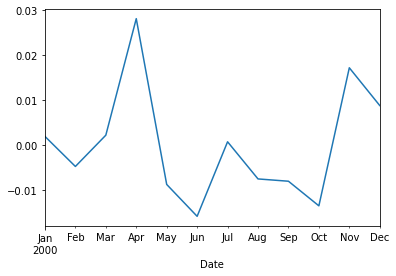

In [46]:
monthly_return['seasonal'].head(12).plot()
plt.show()

수익률에 대한 계절성을 따졌을 때 10월에 사서 4월에 파는게 제일 좋은 방법이다.

## Back Testing

최종 money : 239.42


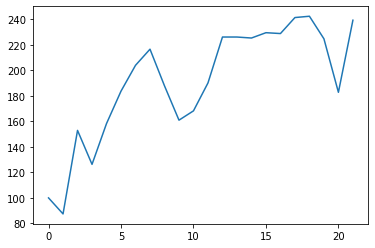

In [106]:
money = 100
money_flow = [100]

buy_month = 10
sell_month = 4

buy_sell = beginning_price[beginning_price.index.month.isin([buy_month, sell_month])].copy()
if buy_month > sell_month:
    buy_sell = buy_sell.iloc[1:]
buy_sell['sign'] = buy_sell.apply(lambda x : 'Buy' if x.name.month == buy_month else 'Sell', axis = 1)

for i in range(len(buy_sell)):
    if buy_sell.iloc[i]['sign'] == 'Buy':
        price = buy_sell.iloc[i]['Close']
    else:
        money *= (buy_sell.iloc[i]['Close'] - price) / price + 1
        money_flow.append(money)
        
print(f"최종 money : {money:.2f}")
plt.plot(money_flow)
plt.show()

최종 money : 152.35


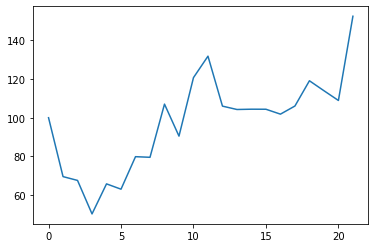

In [107]:
money = 100
money_flow = [100]

buy_month = 4
sell_month = 10

buy_sell = beginning_price[beginning_price.index.month.isin([buy_month, sell_month])].copy()
if buy_month > sell_month:
    buy_sell = buy_sell.iloc[1:]
buy_sell['sign'] = buy_sell.apply(lambda x : 'Buy' if x.name.month == buy_month else 'Sell', axis = 1)

for i in range(len(buy_sell)):
    if buy_sell.iloc[i]['sign'] == 'Buy':
        price = buy_sell.iloc[i]['Close']
    else:
        money *= (buy_sell.iloc[i]['Close'] - price) / price + 1
        money_flow.append(money)
        
print(f"최종 money : {money:.2f}")
plt.plot(money_flow)
plt.show()